向量化的数组运算比纯python同等程度的运算要快很多

In [1]:
import numpy as np

In [2]:
m, n = (5, 3)
x = np.linspace(0, 1, m)
y = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, y)
x

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [3]:
y

array([0. , 0.5, 1. ])

In [4]:
X

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ]])

In [5]:
Y

array([[0. , 0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. , 1. ]])

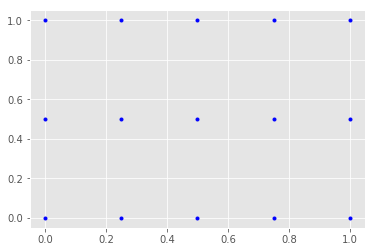

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.plot(X, Y, marker='.', color='blue', linestyle='none')

可以用zip得到网格平面上坐标点的数据：

In [7]:
z = [i for i in zip(X.flat, Y.flat)]
z

[(0.0, 0.0),
 (0.25, 0.0),
 (0.5, 0.0),
 (0.75, 0.0),
 (1.0, 0.0),
 (0.0, 0.5),
 (0.25, 0.5),
 (0.5, 0.5),
 (0.75, 0.5),
 (1.0, 0.5),
 (0.0, 1.0),
 (0.25, 1.0),
 (0.5, 1.0),
 (0.75, 1.0),
 (1.0, 1.0)]

好了，下面继续进入书中的内容

In [8]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points) # xs和ys是一样的
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [9]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

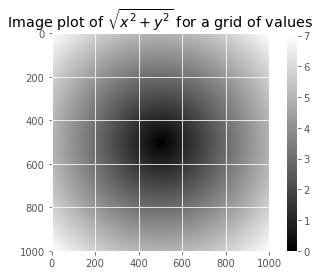

In [10]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

# 1 Expressing Conditional Logic as Array Operations (像数组操作一样表示逻辑条件)

`numpy.where`函数是一个向量版的三相表达式，`x if condition else y`。假设我们有一个布尔数组和两个数组：

In [11]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [12]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]

result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [13]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [14]:
arr = np.random.randn(4, 4)
arr

array([[-0.53892348, -0.327335  ,  1.77787462, -0.87138635],
       [ 0.4179891 ,  1.11897928,  0.4928769 , -1.19939402],
       [ 1.22341628, -2.04870809, -0.45464055,  0.85870705],
       [-0.37879108, -0.77634618,  0.42177954,  0.5635874 ]])

In [15]:
arr > 0

array([[False, False,  True, False],
       [ True,  True,  True, False],
       [ True, False, False,  True],
       [False, False,  True,  True]])

In [16]:
np.where(arr > 0, 2, -2)

array([[-2, -2,  2, -2],
       [ 2,  2,  2, -2],
       [ 2, -2, -2,  2],
       [-2, -2,  2,  2]])

In [17]:
np.where(arr > 0, 2, arr) # set only positive value to 2

array([[-0.53892348, -0.327335  ,  2.        , -0.87138635],
       [ 2.        ,  2.        ,  2.        , -1.19939402],
       [ 2.        , -2.04870809, -0.45464055,  2.        ],
       [-0.37879108, -0.77634618,  2.        ,  2.        ]])

# 2 Mathematical and Statistical Methods (数学和统计方法)




In [18]:
arr = np.random.randn(5, 4)
arr

array([[ 0.70949282,  0.40188498,  0.44325567,  0.28618011],
       [-0.05708803,  0.51728392,  0.33293387, -1.94600255],
       [-0.47150238, -1.92613109, -1.75669165, -0.44779471],
       [ 0.19867   ,  0.71837666, -0.11667179, -1.05023255],
       [-0.88801334, -1.22235236,  0.68354462, -2.77350926]])

In [19]:
arr.mean()

-0.4182183533867686

In [20]:
np.mean(arr)

-0.4182183533867686

In [21]:
arr.sum()

-8.364367067735373

In [22]:
arr.mean(axis=1)

array([ 0.4602034 , -0.2882182 , -1.15052996, -0.06246442, -1.05008259])

In [23]:
arr.sum(axis=0)

array([-0.50844094, -1.5109379 , -0.41362927, -5.93135896])

In [24]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [25]:
np.cumsum?

In [26]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [27]:
arr.cumsum(axis=0) # 沿着行加法

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [28]:
arr.cumprod(axis=1) # 沿着列乘法

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

In [29]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

46

In [30]:
bools = np.array([False, False, True, False])

In [31]:
bools.any()

True

In [32]:
bools.all()

False

# 4 Sorting（排序）

numpy中也有sort方法：

In [33]:
np.random.randn?
# 返回符合正态分布的数值

In [34]:
arr = np.random.randn(6)
arr

array([-0.99721083,  0.66799057, -0.92372798, -1.19668883,  1.77488597,
       -0.1038768 ])

In [35]:
arr.sort()

In [36]:
arr

array([-1.19668883, -0.99721083, -0.92372798, -0.1038768 ,  0.66799057,
        1.77488597])

如果是多维数组，还可以按axis来排序：

In [37]:
arr = np.random.randn(5, 3)
arr

array([[ 0.6294459 ,  0.28354869, -2.51736332],
       [ 0.47273989,  0.46558202, -2.3232264 ],
       [-1.01548093,  2.428637  ,  0.57686834],
       [-0.49745567,  0.44067906,  0.18731414],
       [ 0.8317834 , -0.41399759,  0.74320748]])

In [38]:
arr.sort(1)

In [39]:
arr

array([[-2.51736332,  0.28354869,  0.6294459 ],
       [-2.3232264 ,  0.46558202,  0.47273989],
       [-1.01548093,  0.57686834,  2.428637  ],
       [-0.49745567,  0.18731414,  0.44067906],
       [-0.41399759,  0.74320748,  0.8317834 ]])

In [40]:
large_arr = np.random.randn(1000)
large_arr.sort()

In [41]:
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6847796479223975

In [42]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [43]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [44]:
np.unique(ints)

array([1, 2, 3, 4])

In [45]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [46]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [47]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])